# Assignment2 - Question 1  (Alejandro A. - 301195788)
---

## Imports

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

---

## 1. Retrieve and load Olivetti faces

In [10]:
'''
Olivetti dataset:
10 images for each of the 40 subjects
'''

'\nOlivetti dataset:\n10 images for each of the 40 subjects\n'

In [2]:
olivetti_faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Ale\scikit_learn_data


In [40]:
X = olivetti_faces.data
y = olivetti_faces.target
images = olivetti_faces.images # 64x64 version of .data
print(X.shape)
print(y.shape)

(400, 4096)
(400,)


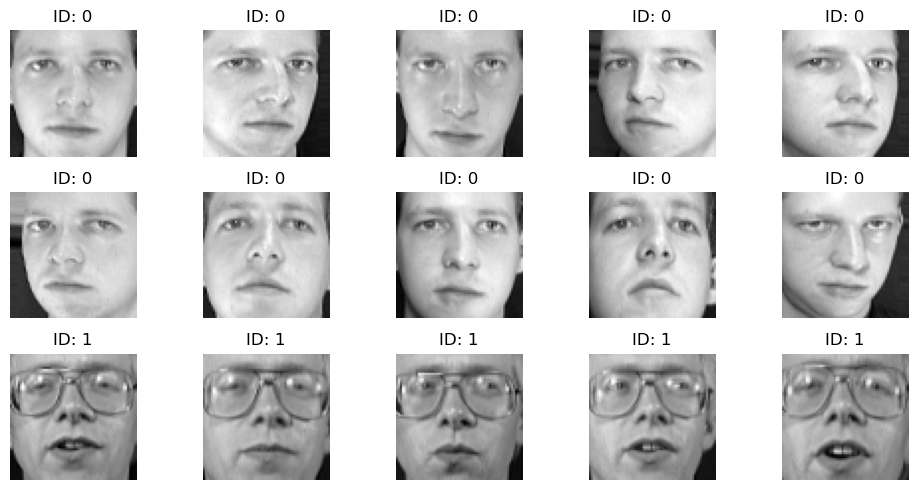

In [39]:
# Plot first 15 images
fig, axes = plt.subplots(3, 5, figsize=(10, 5))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"ID: {y[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

---

## 2. Split train, val, test with stratified sampling

In [41]:
'''
Split is:
80% train
10% validation
10% test
to ensure we have a lot of data to train, 
and also still have some left for validation and testing
'''
# First split into train + validation (90%) and test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y)

# Now split the train + validation set (90%) into train (80%) and validation (10%)
# 10/90 = 0.1111
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1111, random_state=42, stratify=y_train_val)

In [43]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(320, 4096)
(40, 4096)
(40, 4096)


<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

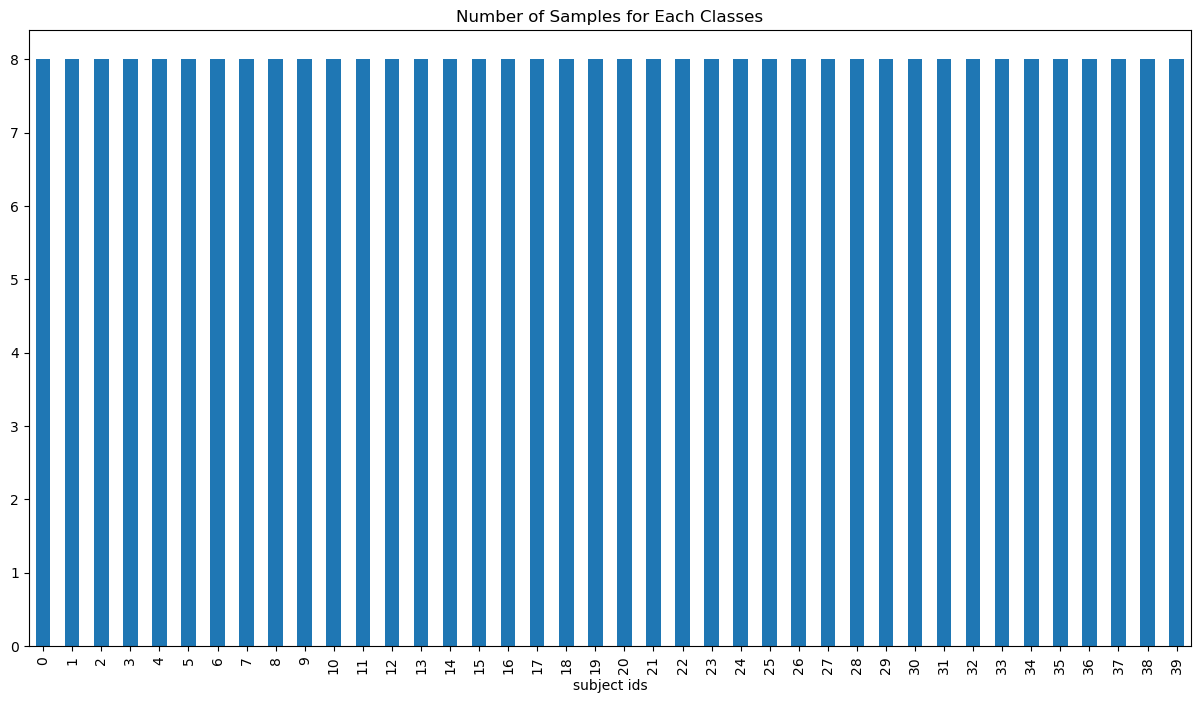

In [51]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

---

## 3. Use k-fold CV, train a classifier, and evaluate on validation set

In [68]:
# Use SVC with linear kernel
clf = SVC(kernel='linear', random_state=42)

# Instantiate StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run k-fold CV
cv_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')

# Print scores
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# Train the classifier on the entire training set
clf.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation set accuracy: {val_accuracy:.4f}")

Cross-validation accuracy scores: [0.9375   1.       0.984375 0.984375 0.9375  ]
Mean cross-validation accuracy: 0.9688
Validation set accuracy: 0.9750


---

## 4. Use K-Means to reduce the dimensionality of the set. Provide your rationale for the similarity measure used to perform the clustering. Use the silhouette score approach to choose the number of clusters.

For k = 2, the silhouette score is 0.1516
For k = 3, the silhouette score is 0.1254
For k = 4, the silhouette score is 0.1067
For k = 5, the silhouette score is 0.1030
For k = 6, the silhouette score is 0.0902
For k = 7, the silhouette score is 0.0972
For k = 8, the silhouette score is 0.0876
For k = 9, the silhouette score is 0.0891
For k = 10, the silhouette score is 0.0904
For k = 11, the silhouette score is 0.0907
For k = 12, the silhouette score is 0.0864
For k = 13, the silhouette score is 0.0833
For k = 14, the silhouette score is 0.0971
For k = 15, the silhouette score is 0.0985
For k = 16, the silhouette score is 0.1060
For k = 17, the silhouette score is 0.1044
For k = 18, the silhouette score is 0.0965
For k = 19, the silhouette score is 0.0982
For k = 20, the silhouette score is 0.1045
For k = 21, the silhouette score is 0.1123
For k = 22, the silhouette score is 0.1116
For k = 23, the silhouette score is 0.1116
For k = 24, the silhouette score is 0.1127
For k = 25, the sil

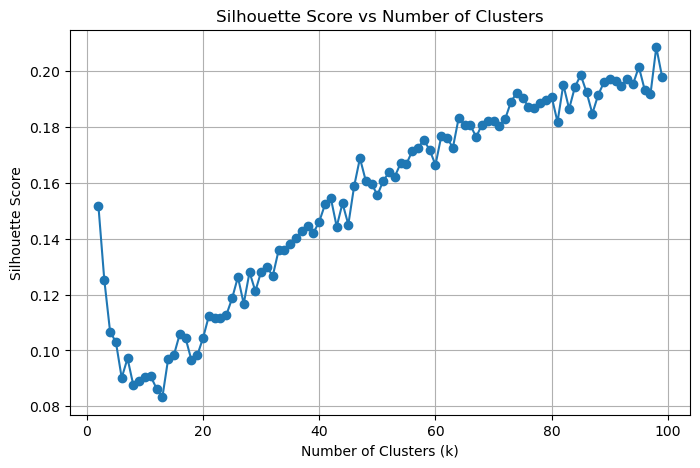

The optimal number of clusters is: 98


In [90]:
# Try different values of k
cluster_range = range(2, 100)
silhouette_scores = []

# Perform KMeans clustering and compute the silhouette score for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k = {k}, the silhouette score is {silhouette_avg:.4f}")

# Plot silhouette scores to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

# Choose the number of clusters with the highest silhouette score
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is: {optimal_k}")

In [91]:
# Reduce dimensionality to the optimal k found previously
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X)

X_reduced = kmeans_optimal.transform(X)

In [92]:
X.shape

(400, 4096)

In [93]:
X_reduced.shape

(400, 98)

In [94]:
y.shape

(400,)

In [95]:
kmeans_optimal.labels_

array([35, 57, 35, 53, 57, 89, 35, 73, 73, 57, 39, 29, 29, 29, 29, 29, 39,
       39, 29, 39, 18,  4,  4,  3,  3, 90,  3,  3, 80, 80, 78,  2, 78, 15,
       15, 53,  0, 78,  2, 15, 81, 81, 81, 81, 48, 48, 81, 48, 48,  7, 75,
       75, 75, 25, 25, 25, 25, 25, 25, 25, 79, 97, 42, 65, 65, 42, 63, 79,
       42, 65, 74, 74, 34, 30, 34, 83, 30, 34, 89, 30, 41, 41, 41, 27, 27,
       27, 14, 27, 27, 27, 88, 88, 51, 51, 72, 72, 72, 88, 49, 83, 76, 76,
       76, 40, 76, 76, 40, 40, 40, 76, 59, 64, 64, 64, 64, 73, 64, 59, 59,
       59,  5,  5, 66, 14, 80, 15, 17, 17, 80, 80, 52, 26, 26, 52, 52, 26,
       52, 52, 26, 26, 36, 19, 36, 36, 19, 36, 19, 36, 19, 19, 62, 35, 35,
       58, 58, 62, 95, 35, 35, 35, 50, 50, 86, 86, 50, 11, 11, 50, 11, 11,
        0, 12, 73, 12, 12, 73,  0, 12,  0, 73, 22, 22, 22,  9,  9, 22,  9,
        9,  9, 22, 24, 24, 24, 96, 44, 96, 44, 44, 44, 24,  8, 17, 17, 19,
       19, 19, 17, 17, 19, 17,  1,  1,  1,  1,  1, 13,  1,  1,  1,  1, 15,
       15, 27, 66, 21, 66

<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

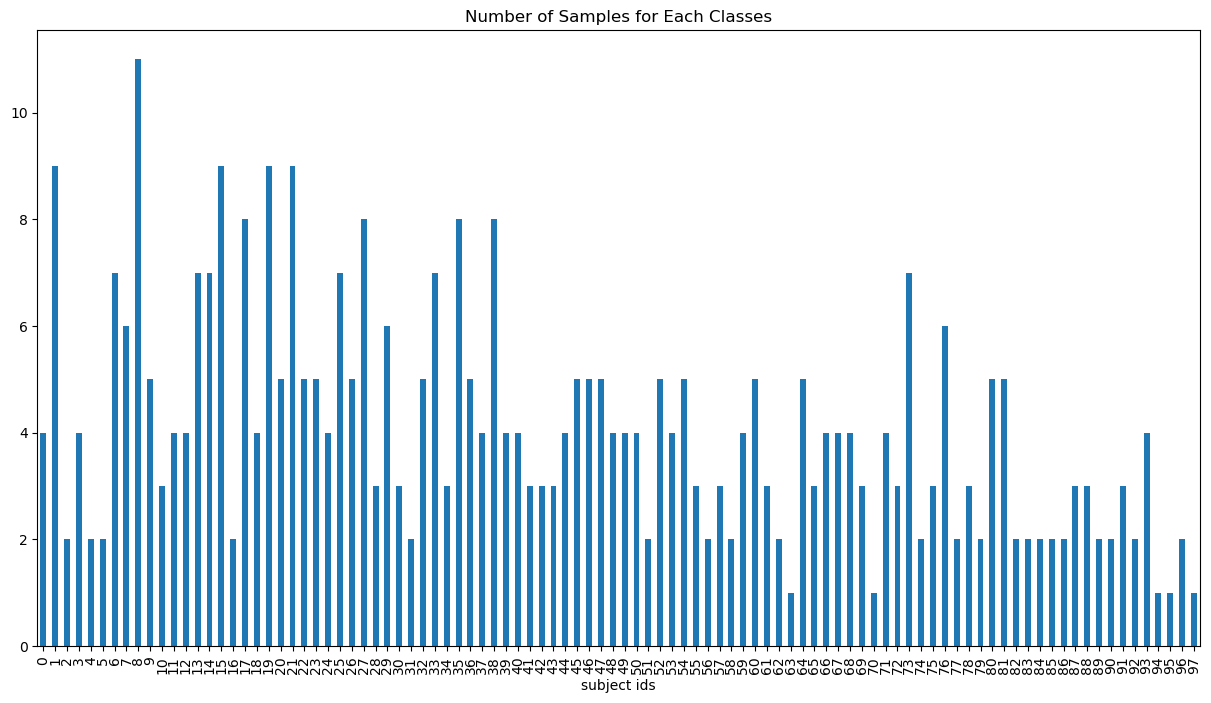

In [96]:
y_frame=pd.DataFrame()
y_frame['subject ids']=kmeans_optimal.labels_
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

---

## 5. Use set from step 4 to train classifier as in step 3

In [ ]:
# First split into train + validation (90%) and test (15%)
X_reduced_train_val, X_reduced_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y)

# Now split the train + validation set (90%) into train (80%) and validation (10%)
# 10/90 = 0.1111
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1111, random_state=42, stratify=y_train_val)

In [ ]:
# Use SVC with linear kernel
clf = SVC(kernel='linear', random_state=42)

# Instantiate StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run k-fold CV
cv_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')

# Print scores
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# Train the classifier on the entire training set
clf.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation set accuracy: {val_accuracy:.4f}")

---

## 6. Apply DBSCAN to dataset. Preprocess images and convert into feature vectors. Use DBSCAN to group images based on density.

In [89]:
results = grid_search.cv_results_

In [90]:
gamma_vals = results['param_kpca__gamma'].data
kernel_vals = results['param_kpca__kernel'].data

mean_test_scores = results['mean_test_score']
kernels = np.unique(kernel_vals)

rbf
[ True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False]
sigmoid
[False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True]


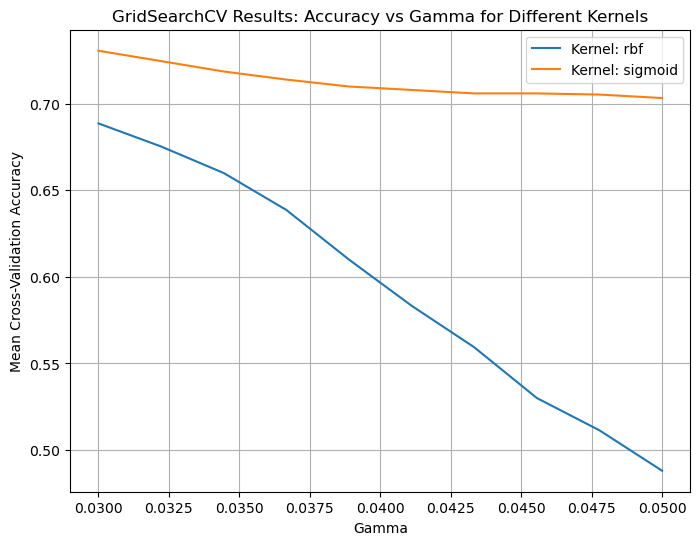

In [91]:
plt.figure(figsize=(8, 6))

for kernel in kernels:
    print(kernel)
    # Get the mask for the current kernel
    mask = (kernel_vals == kernel)
    print(mask)
    
    # Plot gamma vs mean cross-validation score for this kernel
    plt.plot(gamma_vals[mask], mean_test_scores[mask], label=f'Kernel: {kernel}')

# Customize the plot
plt.xlabel('Gamma')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('GridSearchCV Results: Accuracy vs Gamma for Different Kernels')
plt.legend()
plt.grid(True)
plt.show()

---

## References  
- https://www.kaggle.com/code/serkanpeldek/face-recognition-on-olivetti-dataset

---